In [3]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [7]:
# esthetic definitions for the plots
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

font = {'size'   : 16, 'family':'Times New Roman'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [5]:
#############################################
#
# value of k that we want to follow in [1/Mpc]
#
k = 0.5  # 1/Mpc
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                   'output':'tCl,pCl,lCl,mPk','lensing':'yes',
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values':k,
                   # LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.2454,
                   # other options and settings
                   'compute damping scale':'yes', # needed to output the time of damping scale crossing
                   'gauge':'newtonian',
                   'modes':'s,t','A_s':2.100549e-09,'r':0.01,
                   'inverse_omega':0,'scalmass_in_planck':0}

common_settings1 = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                   'output':'tCl,pCl,lCl,mPk','lensing':'yes',
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values':k,
                   # LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.2454,
                   # other options and settings
                   'compute damping scale':'yes', # needed to output the time of damping scale crossing
                   'gauge':'newtonian',
                   'modes':'s,t','A_s':2.100549e-09,'r':0.01,
                   'inverse_omega':1,'scalmass_in_planck':3e-6}
common_settings2 = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                   'output':'tCl,pCl,lCl,mPk','lensing':'yes',
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values':k,
                   # LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.2454,
                   # other options and settings
                   'compute damping scale':'yes', # needed to output the time of damping scale crossing
                   'gauge':'newtonian',
                   'modes':'s,t','A_s':2.100549e-09,'r':0.02,
                   'inverse_omega':1,'scalmass_in_planck':3e-6}
common_settings3 = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                   'output':'tCl,pCl,lCl,mPk','lensing':'yes',
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values':k,
                   # LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.2454,
                   # other options and settings
                   'compute damping scale':'yes', # needed to output the time of damping scale crossing
                   'gauge':'newtonian',
                   'modes':'s,t','A_s':2.100549e-09,'r':0.03,
                   'inverse_omega':1,'scalmass_in_planck':3e-6}
common_settings4 = {# we need to set the output field to something although
                   # the really releveant outpout here will be set with 'k_output_values'
                   'output':'tCl,pCl,lCl,mPk','lensing':'yes',
                   # value of k we want to polot in [1/Mpc]
                   'k_output_values':k,
                   # LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09 ,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.2454,
                   # other options and settings
                   'compute damping scale':'yes', # needed to output the time of damping scale crossing
                   'gauge':'newtonian',
                   'modes':'s,t','A_s':2.100549e-09,'r':0.04,
                   'inverse_omega':1,'scalmass_in_planck':3e-6}  
##############
#    
# call CLASS
#
M = Class()
M.set(common_settings)
M.compute()

M1 = Class()
M1.set(common_settings1)
M1.compute()

M2 = Class()
M2.set(common_settings2)
M2.compute()

M3 = Class()
M3.set(common_settings3)
M3.compute()

M4 = Class()
M4.set(common_settings4)
M4.compute()

#
# load perturbations
#
all_k = M.get_perturbations()  # this potentially constains scalars/tensors and all k values
#    
one_k = all_k['scalar'][0]     # this contains only the scalar perturbations for the requested k values
#    
tau = one_k['tau [Mpc]']
Theta0 = 0.25*one_k['delta_g']
phi = one_k['phi']
psi = one_k['psi']
theta_b = one_k['theta_b']
a = one_k['a']

all_k1 = M1.get_perturbations()  # this potentially constains scalars/tensors and all k values
#    
one_k1 = all_k1['scalar'][0]     # this contains only the scalar perturbations for the requested k values
#    
tau1 = one_k1['tau [Mpc]']
Theta01 = 0.25*one_k1['delta_g']
phi1 = one_k1['phi']
psi1 = one_k1['psi']
theta_b1 = one_k1['theta_b']
a1 = one_k1['a']

weyl1 = one_k1['weyl']
weyldot1 = one_k1['weyldot']

all_k2 = M2.get_perturbations()  # this potentially constains scalars/tensors and all k values
#    
one_k2 = all_k2['scalar'][0]     # this contains only the scalar perturbations for the requested k values
#    
tau2 = one_k2['tau [Mpc]']
Theta02 = 0.25*one_k2['delta_g']
phi2 = one_k2['phi']
psi2 = one_k2['psi']
theta_b2 = one_k2['theta_b']
a2 = one_k2['a']

weyl2 = one_k2['weyl']
weyldot2 = one_k2['weyldot']

all_k3 = M3.get_perturbations()  # this potentially constains scalars/tensors and all k values
#    
one_k3 = all_k3['scalar'][0]     # this contains only the scalar perturbations for the requested k values
#    
tau3 = one_k3['tau [Mpc]']
Theta03 = 0.25*one_k3['delta_g']
phi3 = one_k3['phi']
psi3 = one_k3['psi']
theta_b3 = one_k3['theta_b']
a3 = one_k3['a']

weyl3 = one_k3['weyl']
weyldot3 = one_k3['weyldot']

all_k4 = M4.get_perturbations()  # this potentially constains scalars/tensors and all k values
#    
one_k4 = all_k4['scalar'][0]     # this contains only the scalar perturbations for the requested k values
#    
tau4 = one_k4['tau [Mpc]']
Theta04 = 0.25*one_k4['delta_g']
phi4 = one_k4['phi']
psi4 = one_k4['psi']
theta_b4 = one_k4['theta_b']
a4 = one_k4['a']

weyl4 = one_k4['weyl']
weyldot4 = one_k4['weyldot']


# compute related quantitites    
R = 3./4.*M1.Omega_b()/M1.Omega_g()*a1    # R = 3/4 * (rho_b/rho_gamma)
zero_point = -(1.+R)*psi1               # zero point of oscillations: -(1.+R)*psi
#
# get Theta0 oscillation amplitude (for vertical scale of plot)
#
Theta0_amp = max(Theta01.max(),-Theta01.min())
#
# get the time of decoupling
#
quantities = M1.get_current_derived_parameters(['tau_rec'])
# print times.viewkeys()
tau_rec = quantities['tau_rec']
#
# use table of background quantitites to find the time of
# Hubble crossing (k / (aH)= 2 pi), sound horizon crossing (k * rs = 2pi)
#
background = M1.get_background() # load background table
#print background.viewkeys()
#
background_tau = background['conf. time [Mpc]'] # read confromal times in background table
background_z = background['z'] # read redshift
background_k_over_aH = k/background['H [1/Mpc]']*(1.+background['z']) # read k/aH = k(1+z)/H
background_k_rs = k * background['comov.snd.hrz.'] # read k * rs
background_rho_m_over_r =\
    (background['(.)rho_b']+background['(.)rho_cdm'])\
    /(background['(.)rho_g']+background['(.)rho_ur']) # read rho_r / rho_m (to find time of equality)
#
# define interpolation functions; we want the value of tau when the argument is equal to 2pi (or 1 for equality)
#
tau_at_k_over_aH = interp1d(background_k_over_aH,background_tau)
tau_at_k_rs = interp1d(background_k_rs,background_tau)
tau_at_rho_m_over_r = interp1d(background_rho_m_over_r,background_tau)
#
# finally get these times
#
tau_Hubble = tau_at_k_over_aH(2.*math.pi)
tau_s = tau_at_k_rs(2.*math.pi)
tau_eq = tau_at_rho_m_over_r(1.)

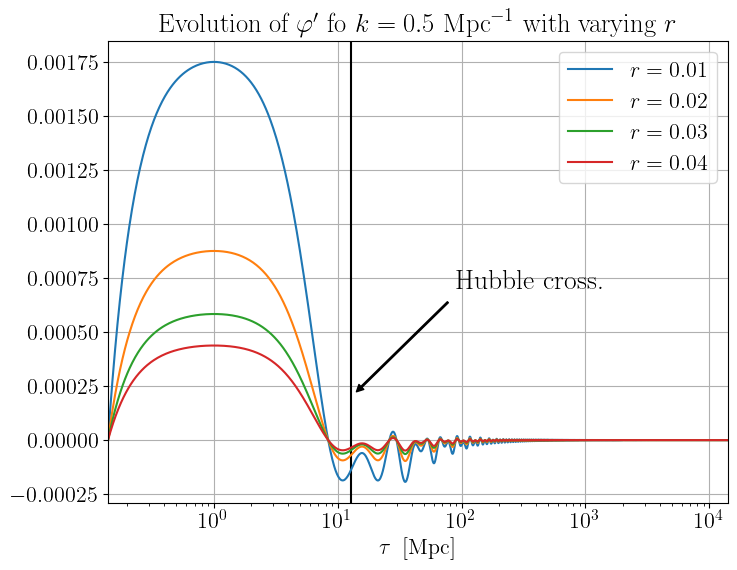

In [8]:
#
#################
#
# start plotting
#
#################
#    
plt.xlim([tau1[0],tau1[-1]])
# plt.ylim([-1.3*Theta0_amp,1.3*Theta0_amp])
plt.xlabel(r'$\tau \,\,\, \mathrm{[Mpc]}$')
plt.title(r'Evolution of $\varphi^{\prime}$ fo $k=0.5$ $\mathrm{Mpc}^{-1}$ with varying $r$')
plt.grid()
#
plt.axvline(x=tau_Hubble,color='black')
# plt.axvline(x=tau_s,color='y')
# plt.axvline(x=tau_eq,color='k')
# plt.axvline(x=tau_rec,color='k')
#
plt.annotate(r'Hubble cross.',
                xy=(tau_Hubble,2*10**-4),
                xytext=(7.0*tau_Hubble,7*10**-4),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1, headlength=5, headwidth=5),
                fontsize=20)
# plt.annotate(r'sound hor. cross.',
#                  xy=(tau_s,-1.0*Theta0_amp),
#                  xytext=(1.5*tau_s,-1.2*Theta0_amp),
#                  arrowprops=dict(facecolor='black', shrink=0.05, width=1, headlength=5, headwidth=5))
# plt.annotate(r'eq.',
#                  xy=(tau_eq,1.08*Theta0_amp),
#                  xytext=(0.45*tau_eq,1.18*Theta0_amp),
#                  arrowprops=dict(facecolor='black', shrink=0.05, width=1, headlength=5, headwidth=5))
# plt.annotate(r'rec.',
#                  xy=(tau_rec,1.08*Theta0_amp),
#                  xytext=(0.45*tau_rec,1.18*Theta0_amp),
#                  arrowprops=dict(facecolor='black', shrink=0.05, width=1, headlength=5, headwidth=5))
#
# Possibility to add functions one by one, saving between each (for slides)
#
# plt.semilogx(tau,psi,'y-',label=r'$\psi$')
# #plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
# #plt.savefig('one_k_1.pdf',bbox_inches='tight')
# #
# plt.semilogx(tau,phi,'r-',label=r'$\phi$')
# #plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
# #plt.savefig('one_k_2.pdf',bbox_inches='tight')
# #
# plt.semilogx(tau,zero_point,'k:',label=r'$-(1+R)\psi$')
# #plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
# #plt.savefig('one_k_3.pdf',bbox_inches='tight')
# #
# plt.semilogx(tau,Theta0,'b-',linewidth=2,label=r'$\Theta_0$')
# #plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
# #plt.savefig('one_k_4.pdf',bbox_inches='tight')
# #
# plt.semilogx(tau,Theta0+psi,'c-',linewidth=2,label=r'$\Theta_0+\psi$')
# #plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
# #plt.savefig('one_k_5.pdf',bbox_inches='tight')
# #
# plt.semilogx(tau,theta_b,'g-',label=r'$\theta_b$')
# plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

# plt.semilogx(tau,weyl,'b-',label=r'$\varphi$')
plt.semilogx(tau1,weyldot1,label=r'$r=0.01$')
plt.semilogx(tau2,weyldot2,label=r'$r=0.02$')
plt.semilogx(tau3,weyldot3,label=r'$r=0.03$')
plt.semilogx(tau4,weyldot4,label=r'$r=0.04$')

plt.legend(loc='upper right')

plt.savefig('weyldot_r.png',bbox_inches='tight')
#

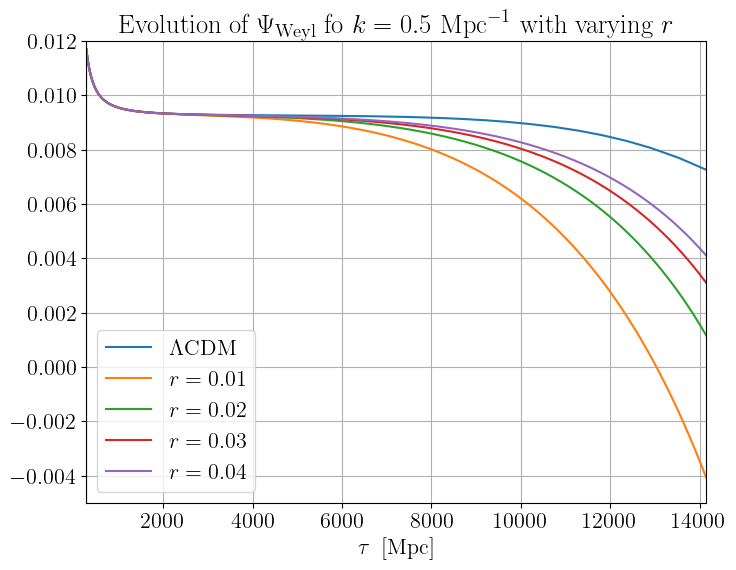

In [12]:
plt.xlabel(r'$\tau \,\,\, \mathrm{[Mpc]}$')
plt.title(r'Evolution of $\Psi_\mathrm{Weyl}$ fo $k=0.5$ $\mathrm{Mpc}^{-1}$ with varying $r$')
plt.grid()
#
plt.axvline(x=tau_rec,color='k')

plt.xlim([tau_rec,tau1[-1]])
plt.ylim([-0.005,0.012])
#
# plt.annotate(r'Hubble cross.',
#                 xy=(1.1*tau_Hubble,0.15),
#                 xytext=(7.0*tau_Hubble,0.1),
#                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headlength=5, headwidth=5),
#                 fontsize=20)

plt.plot(tau,psi+phi,label=r'$\Lambda$CDM')
plt.plot(tau1,psi1+phi1,label=r'$r=0.01$')
plt.plot(tau2,psi2+phi2,label=r'$r=0.02$')
plt.plot(tau3,psi3+phi3,label=r'$r=0.03$')
plt.plot(tau4,psi4+phi4,label=r'$r=0.04$')

plt.legend(loc='lower left')

plt.savefig('weylscalar_r.png',bbox_inches='tight')